In [6]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../")
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [7]:
env = BlackjackEnv()

In [ ]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.

    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.

    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.

    returns_sum = defaultdict(float)


    #tracks the number of times each state has been visited
    returns_count = defaultdict(float)

    # The final value function
    V = defaultdict(float)

    # Implement this!
    for ep in range(1, num_episodes + 1):
        #return state = sum of the current hand, dealer's card, usable ace
        state = env.reset()
        #each episode is a list of (state, action, reward) tuples
        episode = []
        finish = False

        while not finish:
            #return 0 for stick and 1 for twist
            action = policy(state)
            #get the reward, next state, and whether the game is finished
            next_state, reward, finish, _ = env.step(action)
            #append the episode
            episode.append((state, action, reward))
            state = next_state

        #get the states that have been visited in this episode
        unique_states = set([tuple(x[0]) for x in episode])

        for state in unique_states:

            #find first occurence of this state so we can find the cumuluative return from that point onwards
            first = -1
            for i, step in enumerate(episode):
                if tuple(step[0]) == state:
                    first = i
                    break

            #calculate the cumulative return
            G = 0 #return G
            power = 0
            #we want to start from that state until the end of the episode to sum the return
            for step in episode[first:]:
                reward = step[2]
                G += reward * (discount_factor ** power)
                power += 1
            #update the returns_sum and returns_count
            returns_sum[state] += G
            returns_count[state] += 1

            #update value function (mean)
            V[state] = returns_sum[state] / returns_count[state]
    return V

In [9]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

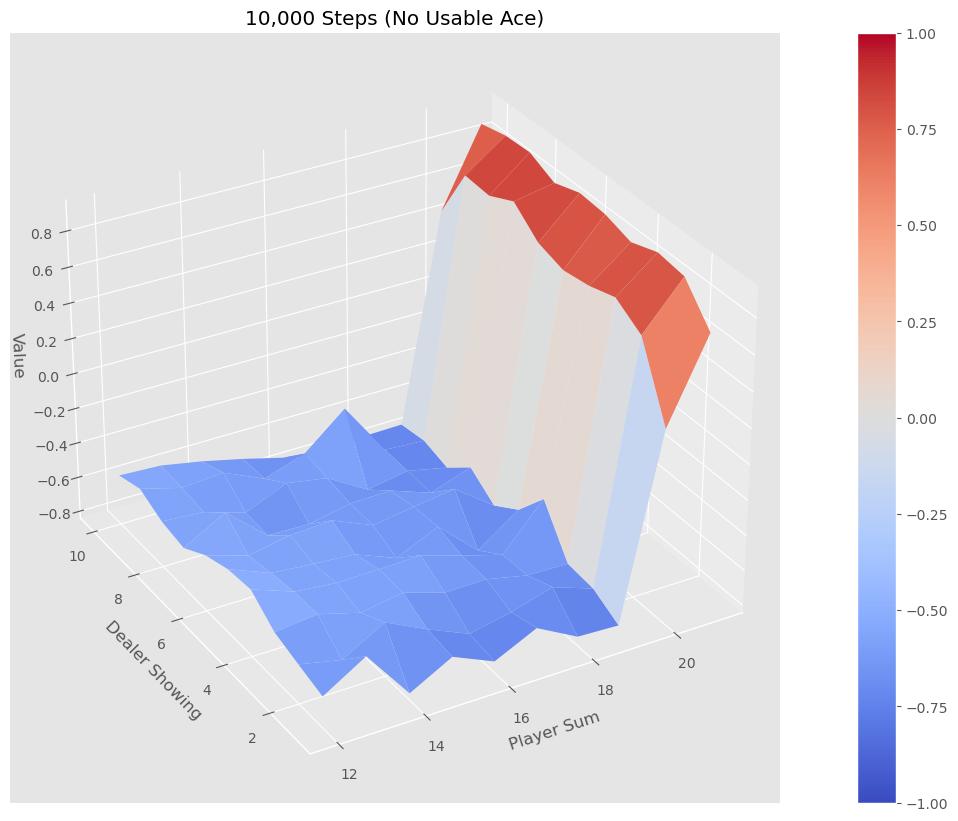

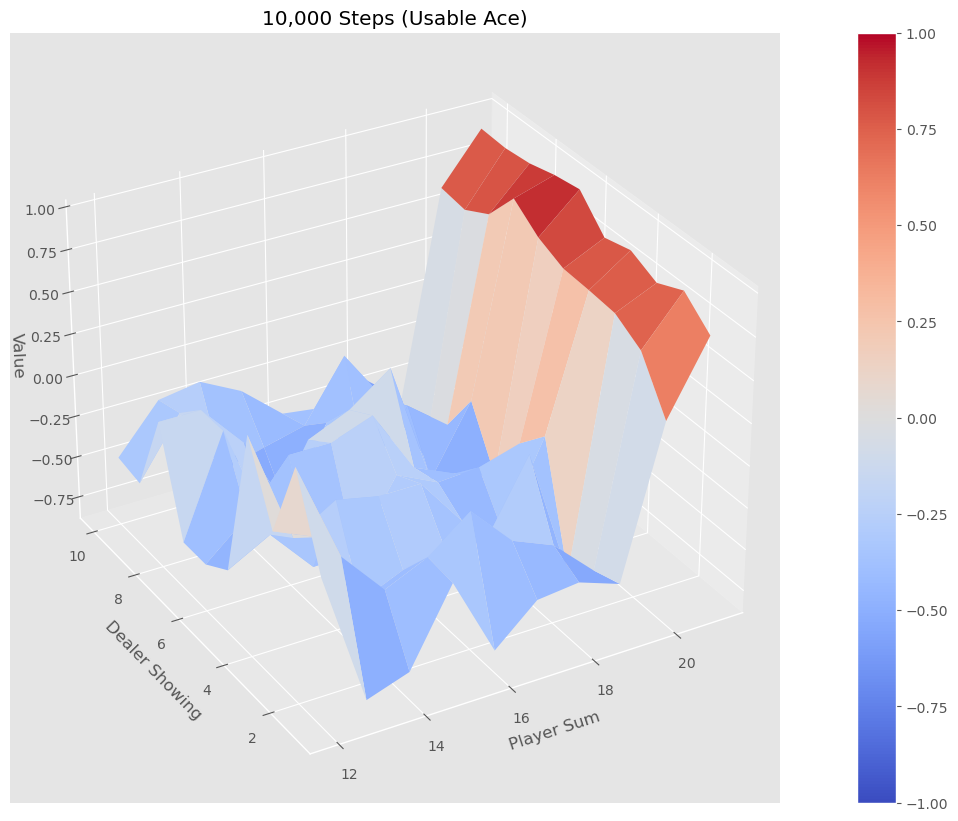

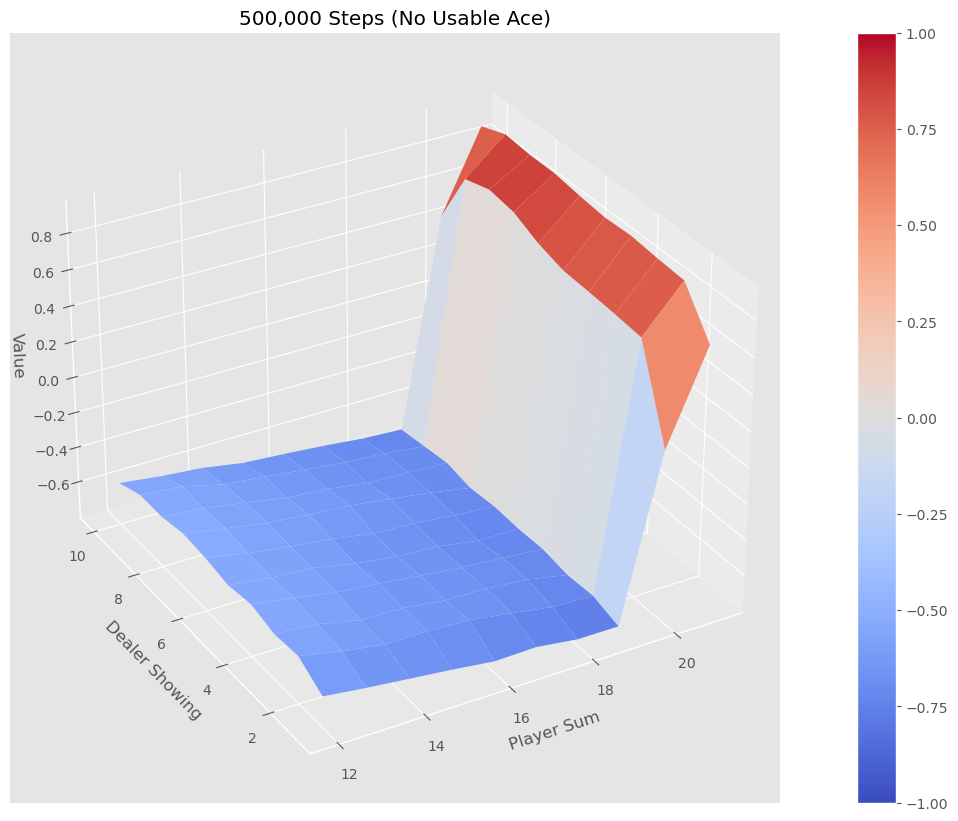

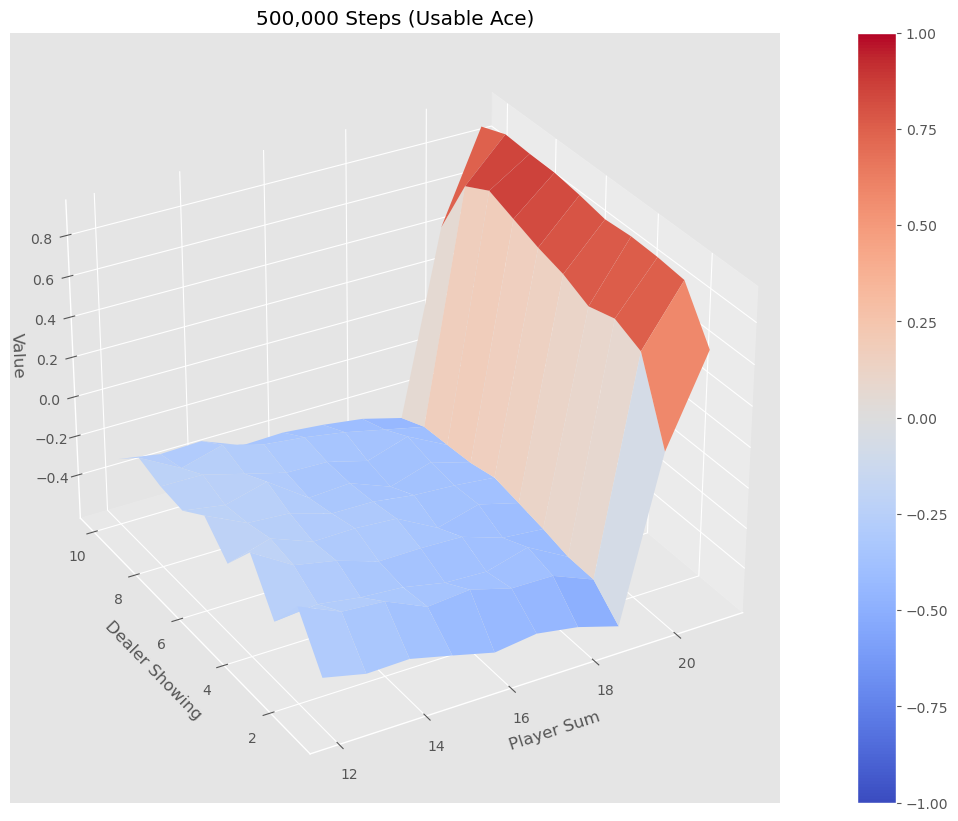

In [10]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")